## Summer 2022 Data Science Intern Challenge   
## Question 1: 

**by Anqi Li**  
2022/01/07

Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

#### (1) Importing data

In [1]:
import pandas as pd
#load data as data frame
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
#check data
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


#### (2) Calculate the AOV and evaluate this data

In [2]:
print(f"The number of sneakers shops: {df['shop_id'].nunique()}")
print(f"The total number of orders: {len(df)}")
print(f"The total revenue: ${df['order_amount'].sum()}")
print(f"The average order value: ${round(df['order_amount'].sum()/len(df), 2)}")

The number of sneakers shops: 100
The total number of orders: 5000
The total revenue: $15725640
The average order value: $3145.13


Given that we know these shops are selling sneakers, the AOV seems much higher than normal expectation. 
According to my speculation, this may indicate we have outliers pushing the value way up.  
I will do the following approach to check if this is true.

In [3]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

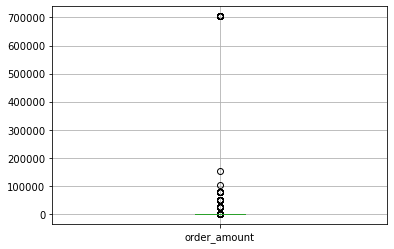

In [4]:
#A simple box plot to check if outliers exist
boxplot = df.boxplot(column=['order_amount'])

It is easy to see that there's outliers. The AOV is not representative (and misleading...) for our analysis.  
I did a simple data filter to monitor the outliers here.

In [5]:
outlier = df[df.order_amount>200000]
outlier

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


By looking at the outliers, the shop_id, user_id, order_amount, total_items, payment_method and even the timestamp is exactly the same - which is almost impossible. I would say there is be an error in the data generation process which needs to be checked.   
However, given no further information(like if this transition exists), removing them is very arbitrary, so I would first keep the outliers for my following calculation for the metrics. And if I know the correct data, I would correct the following values as well.

### b. What metric would you report for this dataset?

The fact that outliers exist means using AOV to evaluate is not proper here.  
Actually, only by looking at "average" order value is not a proper approach to evaluate customers' purchase behavior. When evaluate user purchase behaviours, we should consider all three measures of central tendency - mean, median and mode. 


#### Median order value
Using the median is more robust to deal with the situation with the outlier. 

In [6]:
median_order_value=df['order_amount'].median()
print(f"Median order value: ${median_order_value}")

Median order value: $284.0


#### Modal order value

In [7]:
modal_order_value=df.mode(axis='index', numeric_only=True)['order_amount'][0]
print(f"Modal order value: ${modal_order_value}")
#how many orders have this order value
print(f"There are {len(df[df.order_amount==modal_order_value])} orders with this value.")

Modal order value: $153.0
There are 87 orders with this value.


#### Data distribution

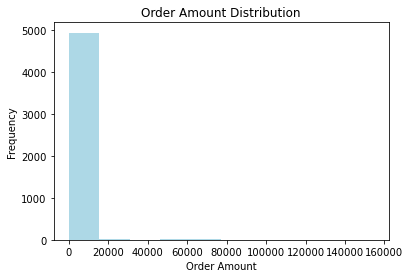

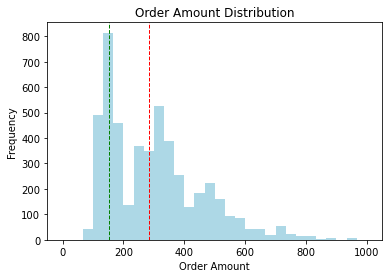

In [13]:
import matplotlib.pyplot as plt
#to make the data distribution shown clearly, outliers are removed
df_no_outlier = df[df.order_amount<700000]
plt.hist(df_no_outlier['order_amount'], bins=10, color="lightblue")
plt.title("Order Amount Distribution")
plt.xlabel("Order Amount")
plt.ylabel("Frequency")
plt.show()

#take a closer look
plt.hist(df_no_outlier['order_amount'], bins=30, range=[0, 1000], color="lightblue")
plt.title("Order Amount Distribution")
#the red line represents the median order value
plt.axvline(median_order_value, color='red', linestyle='dashed', linewidth=1)
#the green line represents the modal order value
plt.axvline(modal_order_value, color='green', linestyle='dashed', linewidth=1)
plt.xlabel("Order Amount")
plt.ylabel("Frequency")
plt.show()

#### Summary for question b:
- Although is difficult to tell which one is the best, using only the mean one is the worst especially given the existing outliers.   
- If I have to choose one to report, I would say the modal order value. My reason is:   
From the histogram, there are over 800 orders near the modal order value, which is more representative of "quite a number of" data to some extent. Consider the application scenario, the modal shows the most frequent order amount. If we want to boost sales, we can first focus on these orders, try upsell stragedies after understanding them, which is a more efficient approach.

### c: What is its value?

In [ ]:
print(f"Its value is ${modal_order_value}.")